# WZGW Projekt 2 - astronomia geodezyjna

### Mini sprawko Nr indeksu: 311512
'

'

'

'

'

'

'

'

'

'

'

'

'

'

'

'



In [536]:
import numpy as np
import pandas as pd
import datetime
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# import plotly.express as px
import plotly
%matplotlib inline
plt.style.use('seaborn-poster')
# sns.set_theme()

In [537]:
jd = datetime.datetime(2021, 12, 1, 15)
print(jd)
jd = pyasl.jdcnv(jd)
# jd = pyasl.juldate(jd)
print(jd)
# cjd = pyasl.get_juldate()
# cjd

2021-12-01 15:00:00
2459550.125


# Zadanie

In [538]:
# -- deklinacja w stopniach
# pyasl.degToDMS(16.74566666666667)
# pyasl.dmsToDeg(-16,44,44.4)
# pyasl.dmsToDeg(-16,44,44.5)
# pyasl.dmsToDeg(-16,44,44.6)

In [539]:
# -- rektascensja w stopniach
# pyasl.hmsToDeg(6, 46, 7.35)
# pyasl.hmsToDeg(6, 46, 7.36)

In [540]:
orig_df = pd.read_csv('syriusz.csv', sep=';')

In [541]:
orig_df['Juliandate'] = pd.Series(map(
                                        lambda r,m,d,g: pyasl.jdcnv(datetime.datetime(r,m,d,g)),
                                        orig_df['Rok'],
                                        orig_df['Miesiąc'],
                                        orig_df['Dzień'],
                                        orig_df['Godzina'],
                                     )
                                 )

In [542]:
temp = pd.Series(map(lambda jd,ra,dec,fi,lam,al: pyasl.eq2hor(jd,ra,dec,lat=fi,lon=lam,alt=al,B1950=False,precess=False,nutate=False,aberration=False,refract=False),
                                orig_df['Juliandate'],
                                orig_df['Rektascensja'],
                                orig_df['Deklinacja'],
                                orig_df['fi_WW'],
                                orig_df['lam_WW'],
                                orig_df['alt_WW']
                                
                                )
                            )
orig_df['h_WW'] = pd.Series(map(lambda row: row[0][0], temp))
orig_df['az_WW'] = pd.Series(map(lambda row: row[1][0], temp))

temp = pd.Series(map(lambda jd,ra,dec,fi,lam,al: pyasl.eq2hor(jd,ra,dec,lat=fi,lon=lam,alt=al,B1950=False,precess=False,nutate=False,aberration=False,refract=False),
                                orig_df['Juliandate'],
                                orig_df['Rektascensja'],
                                orig_df['Deklinacja'],
                                orig_df['fi_RG'],
                                orig_df['lam_RG'],
                                orig_df['alt_RG']
                                
                                )
                            )
orig_df['h_RG'] = pd.Series(map(lambda row: row[0][0], temp))
orig_df['az_RG'] = pd.Series(map(lambda row: row[1][0], temp))

temp = pd.Series(map(lambda jd,ra,dec,fi,lam,al: pyasl.eq2hor(jd,ra,dec,lat=fi,lon=lam,alt=al,B1950=False,precess=False,nutate=False,aberration=False,refract=False),
                                orig_df['Juliandate'],
                                orig_df['Rektascensja'],
                                orig_df['Deklinacja'],
                                orig_df['fi_AN'],
                                orig_df['lam_AN'],
                                orig_df['alt_AN']
                                
                                )
                            )
orig_df['h_AN'] = pd.Series(map(lambda row: row[0][0], temp))
orig_df['az_AN'] = pd.Series(map(lambda row: row[1][0], temp))

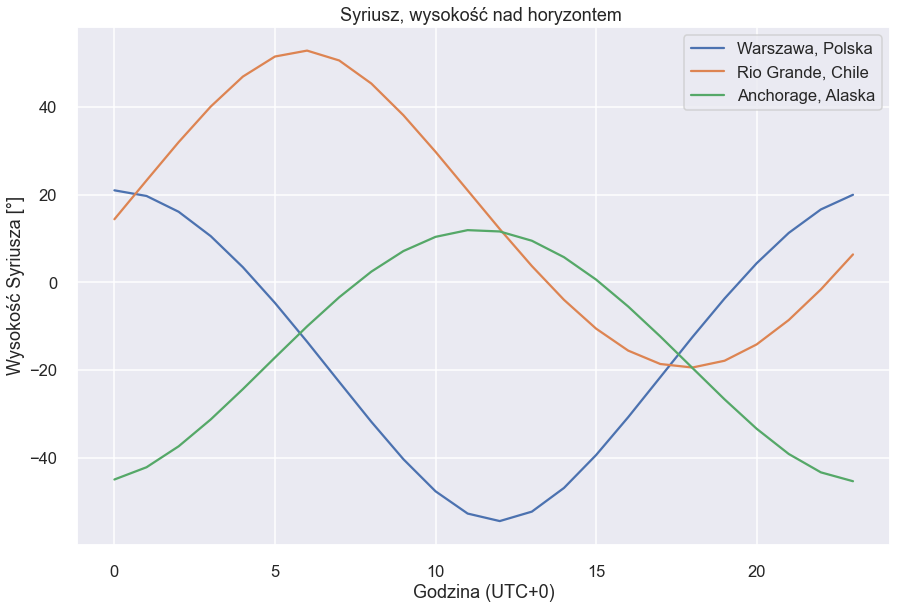

In [543]:
sns.set_theme(context='talk', style='darkgrid')

plt.plot(orig_df['Godzina'], orig_df['h_WW'], label="Warszawa, Polska")
plt.plot(orig_df['Godzina'], orig_df['h_RG'], label="Rio Grande, Chile")
plt.plot(orig_df['Godzina'], orig_df['h_AN'], label="Anchorage, Alaska")

plt.title('Syriusz, wysokość nad horyzontem ')
plt.xlabel('Godzina (UTC+0)')
plt.ylabel('Wysokość Syriusza [°]')
plt.legend()

plt.tight_layout()
plt.show()

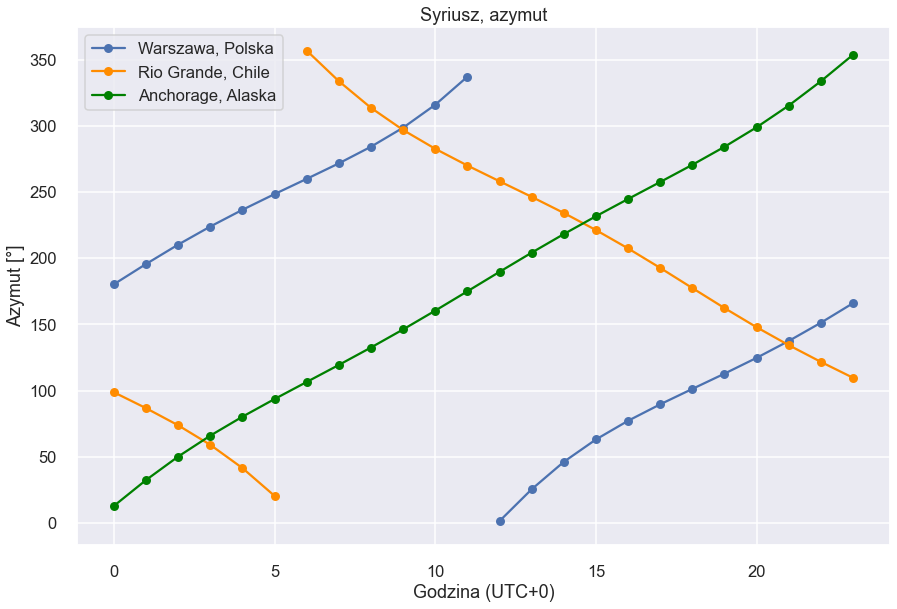

In [544]:
sns.set_theme(context='talk', style='darkgrid')

# plt.plot(orig_df['Godzina'], orig_df['az_WW'], 'o', label="Warszawa, Polska")
# plt.plot(orig_df['Godzina'], orig_df['az_RG'], 'o', label="Rio Grande, Chile")
# plt.plot(orig_df['Godzina'], orig_df['az_AN'], 'o', label="Anchorage, Alaska")
plt.plot(orig_df['Godzina'][:12], orig_df['az_WW'][:12], color='b',marker='o', label="Warszawa, Polska")
plt.plot(orig_df['Godzina'][12:], orig_df['az_WW'][12:], color='b',marker='o')
plt.plot(orig_df['Godzina'][:6], orig_df['az_RG'][:6], color='darkorange', label="Rio Grande, Chile",marker='o')
plt.plot(orig_df['Godzina'][6:], orig_df['az_RG'][6:], color='darkorange',marker='o')
plt.plot(orig_df['Godzina'], orig_df['az_AN'], color='green', label="Anchorage, Alaska",marker='o')

plt.title('Syriusz, azymut')
plt.xlabel('Godzina (UTC+0)')
plt.ylabel('Azymut [°]')
plt.legend()

plt.tight_layout()
plt.show()

In [545]:
orig_df.columns

Index(['Rok', 'Miesiąc', 'Dzień', 'Godzina', 'Rektascensja', 'Deklinacja',
       'fi_RG', 'lam_RG', 'fi_WW', 'lam_WW', 'fi_AN', 'lam_AN', 'alt_RG',
       'alt_WW', 'alt_AN', 'Juliandate', 'h_WW', 'az_WW', 'h_RG', 'az_RG',
       'h_AN', 'az_AN'],
      dtype='object')

In [689]:
orig_df['z_WW'] = 90 - orig_df['h_WW']
orig_df['z_AN'] = 90 - orig_df['h_AN']
orig_df['z_RG'] = 90 - orig_df['h_RG']
orig_df['xx_WW'] = 1 * np.sin(np.deg2rad(orig_df['z_WW'])) * np.cos(np.deg2rad(orig_df['az_WW']))
orig_df['xx_AN'] = 1 * np.sin(np.deg2rad(orig_df['z_AN'])) * np.cos(np.deg2rad(orig_df['az_AN']))
orig_df['xx_RG'] = 1 * np.sin(np.deg2rad(orig_df['z_RG'])) * np.cos(np.deg2rad(orig_df['az_RG']))
orig_df['yy_WW'] = 1 * np.sin(np.deg2rad(orig_df['z_WW'])) * np.sin(np.deg2rad(orig_df['az_WW']))
orig_df['yy_AN'] = 1 * np.sin(np.deg2rad(orig_df['z_AN'])) * np.sin(np.deg2rad(orig_df['az_AN']))
orig_df['yy_RG'] = 1 * np.sin(np.deg2rad(orig_df['z_RG'])) * np.sin(np.deg2rad(orig_df['az_RG']))
orig_df['zz_WW'] = 1 * np.cos(np.deg2rad(orig_df['z_WW']))
orig_df['zz_AN'] = 1 * np.cos(np.deg2rad(orig_df['z_AN']))
orig_df['zz_RG'] = 1 * np.cos(np.deg2rad(orig_df['z_RG']))

In [690]:
orig_df['widac_WW'] = orig_df['h_WW'] > 0
orig_df['widac_WW'] = pd.Series(map(lambda x: int(x) ,orig_df['widac_WW']))

In [692]:
theta = np.linspace(0,2*np.pi,100)
phi = np.linspace(0,np.pi,100)

clr1 = 'blue'
clr2 = 'lightblue'
lighting_effects = dict(ambient=0.4, diffuse=0.5, roughness=0.9, specular=0.6, fresnel=0.2)
le = dict(ambient=1, diffuse=0.5, roughness=1, specular=0.0, fresnel=1)

x0 = 1 * np.outer(np.cos(theta),np.sin(phi))
y0 = 1 * np.outer(np.sin(theta),np.sin(phi))
z0 = 1 * np.outer(np.ones(100),np.cos(phi))
s = go.Surface(x=x0, y=y0, z=z0, opacity=0.2, colorscale = 'earth',
               lighting=le, 
               lightposition={'x':0,'y':0,'z':10}) # , colorscale=[[0,clr1], [1,clr2]] , colorscale = 'earth'

g = go.Scatter3d(x=orig_df['yy_WW'], y=orig_df['xx_WW'], z=orig_df['zz_WW'], 
                 mode='markers',
                 marker=dict(color=orig_df['widac_WW'], colorscale='blues', reversescale=True, size=12, )
                )

# osie x i y mają odwrotne oznaczenia na wykresie
# plotly.graph_objs.Layout
# , layout={'title':"sample figure", 'xaxis':{'title':{'text':'sads'}}}
# wtf = plotly.graph_objects.layout.XAxis({'title':'ASDFYGI YGN'})
# , layout={'title':"sample figure", 'xaxis':wtf}
fig = go.Figure(data = [s, g])
# fig.update_xaxes(title={'text': 'asdasd', 'font':plotly.graph_objs.layout.xaxis.title.Font('Arial')})
fig.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0}, scene_aspectmode='data', )


fig.show()